# BORG SDSS data products
## borg_sdss_tweb package
* Authors: Florent Leclercq, Jens Jasche, Benjamin Wandelt
* Last update: 09/10/2018

This package contains the maps obtained by [Leclercq et al. (2015b)](https://arxiv.org/abs/1502.02690), who performed a Bayesian analysis of the cosmic web in the SDSS volume. These maps can be used as inputs to the decision-theoretic framework introduced by [Leclercq et al. (2015c)](https://arxiv.org/abs/1503.00730).

The results are four probabilistic maps of the voids, sheets, filaments, and clusters. Structures are defined using the T-web algorithm ([Hahn et al. 2007](https://arxiv.org/abs/astro-ph/0610280)). Data are provided in terms of a standard 3D numpy array and can easily be accessed and processed suign python.

For further details on the data and employed methods please consult [Leclercq et al. (2015b)](https://arxiv.org/abs/1502.02690) and [Leclercq et al. (2015c)](https://arxiv.org/abs/1503.00730) (references below).

## File content

This package consists of two files:
* **borg_sdss_tweb.ipynb**: The file you are currently reading.
* **borg_sdss_tweb.tar.gz**: Archive available on [GitHub LFS](https://github.com/florent-leclercq/borg_sdss_data_release/blob/master/borg_sdss_tweb/borg_sdss_tweb.tar.gz) and on [the author's website](http://www.florent-leclercq.eu/data/borg_sdss_tweb.tar.gz).

The archive borg_sdss_tweb.tar.gz can be extracted using

```bash
tar -xzf borg_sdss_tweb.tar.gz
```

It contains the file **borg_sdss_tweb.npz**.

## Usage

### Loading and accessing the data

The file **borg_sdss_tweb.npz** contains the probabilistic structure types maps in a standard uncompressed .npz format. To load and process the data execute the following commands:

In [1]:
import numpy as np
tweb = np.load('borg_sdss_tweb.npz')

To access the 3D structure maps use:

In [2]:
#3D probabilistic maps for T-web structures
V=tweb['voids']
S=tweb['sheets']
F=tweb['filaments']
C=tweb['clusters']

Individual voxels in this 3D volumetric data cube can be accessed as follows:

In [3]:
k=10;j=127;i=243
V_ijk=V[k,j,i]

where i,j and k index voxel positions along the x,y and z axes respectively. All indices run from 0 to 255.

The ranges describing the extent of the cubic cartesian volume along the x,y and z axes can be accessed as follows:

In [4]:
#Minimum and maximum position along the x-axis in Mpc/h
xmin=tweb['ranges'][0]
xmax=tweb['ranges'][1]

#Minimum and maximum position along the y-axis in Mpc/h
ymin=tweb['ranges'][2]
ymax=tweb['ranges'][3]

#Minimum and maximum position along the z-axis in Mpc/h
zmin=tweb['ranges'][4]
zmax=tweb['ranges'][5]

Units are Mpc/h.

(Note that all the maps that are part of the BORG SDSS data products have consistent coordinate systems. The coordinate transform to change from Cartesian to spherical coordinates and vice versa is given in appendix B of [Jasche et al. 2015](https://arxiv.org/abs/1409.6308)).

### Example plot: Structure types map

Some useful definitions for the following plots:

In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
%matplotlib inline

The following code can be used to to reproduce figure 3 in [Leclercq et al. (2015b)](https://arxiv.org/abs/1502.02690).

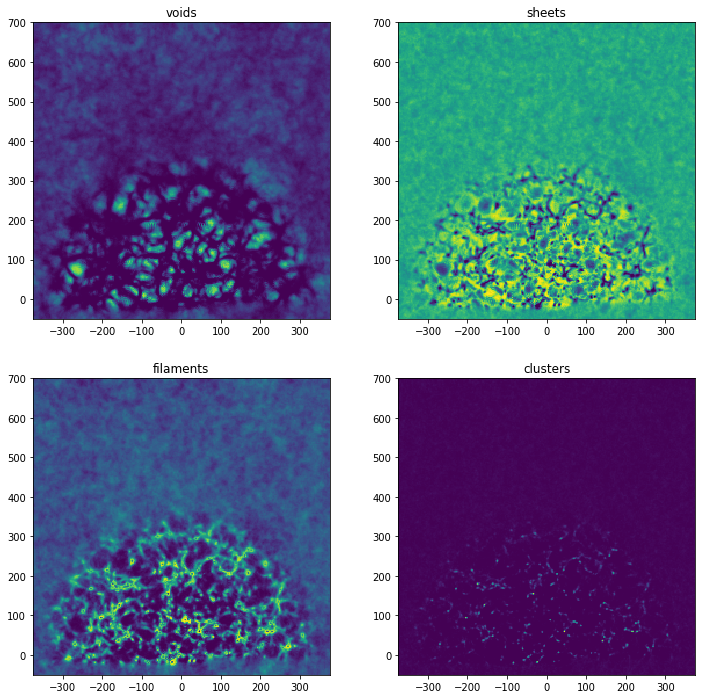

In [6]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='row', sharey='col', figsize=(12,12))
ax1.imshow(V[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], vmin=0., vmax=1., cmap="viridis")
ax1.set_title("voids")
ax2.imshow(S[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], vmin=0., vmax=1., cmap="viridis")
ax2.set_title("sheets")
ax3.imshow(F[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], vmin=0., vmax=1., cmap="viridis")
ax3.set_title("filaments")
ax4.imshow(C[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], vmin=0., vmax=1., cmap="viridis")
ax4.set_title("clusters")
plt.show()

### Example plot: Entropy

The entropy is computed as follows:

In [7]:
import warnings
warnings.filterwarnings("ignore")

VlogV = V*np.log2(V)
SlogS = S*np.log2(S)
FlogF = F*np.log2(F)
ClogC = C*np.log2(C)
VlogV[np.isnan(VlogV)]=0.
SlogS[np.isnan(SlogS)]=0.
FlogF[np.isnan(FlogF)]=0.
ClogC[np.isnan(ClogC)]=0.

H = - VlogV - SlogS - FlogF - ClogC

We can now plot a slice, reproducing figure 4 (left) in [Leclercq et al. (2015b)](https://arxiv.org/abs/1502.02690):

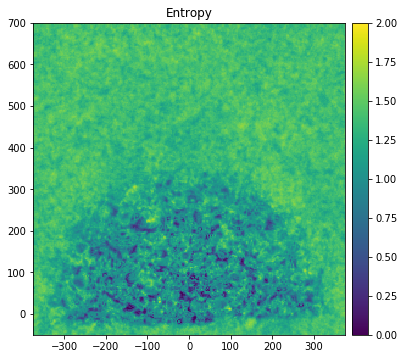

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(H[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], vmin=0., vmax=2., cmap="viridis")
ax.set_title("Entropy")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im, cax=cax)
plt.show()

### Example plot: Information gain (Kullback-Leibler divergence)

We first define th prior probabilities (numbers are given in table II in [Leclercq et al. 2015b](https://arxiv.org/abs/1502.02690)):

In [9]:
Prior_V = 0.14261
Prior_S = 0.59561
Prior_F = 0.24980
Prior_C = 0.01198

The information gain (Kullback-Leibler divergence) is computed as follows:

In [10]:
VlogV = V*np.log2(V)
SlogS = S*np.log2(S)
FlogF = F*np.log2(F)
ClogC = C*np.log2(C)
VlogV[np.isnan(VlogV)]=0.
SlogS[np.isnan(SlogS)]=0.
FlogF[np.isnan(FlogF)]=0.
ClogC[np.isnan(ClogC)]=0.

VlogPrior_V = V*np.log2(Prior_V)
SlogPrior_S = S*np.log2(Prior_S)
FlogPrior_F = F*np.log2(Prior_F)
ClogPrior_C = C*np.log2(Prior_C)

DKL = VlogV + SlogS + FlogF + ClogC - VlogPrior_V - SlogPrior_S - FlogPrior_F - ClogPrior_C

We can now plot a slice, reproducing figure 4 (right) in [Leclercq et al. (2015b)](https://arxiv.org/abs/1502.02690):

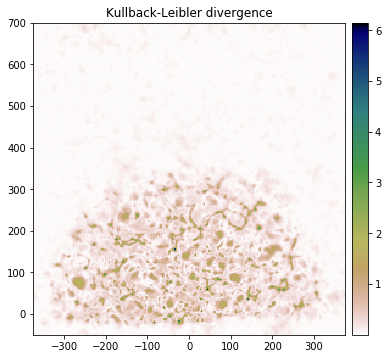

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(DKL[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], cmap="gist_earth_r")
ax.set_title("Kullback-Leibler divergence")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im, cax=cax)
plt.show()

### Example plot: Decision theory ([Leclercq et al. 2015c](https://arxiv.org/abs/1503.00730))

We first define the posteriors, i.e. the 3D probabilistic maps for T-web structures:

In [12]:
Posterior_l0=tweb['voids']
Posterior_l1=tweb['sheets']
Posterior_l2=tweb['filaments']
Posterior_l3=tweb['clusters']

and the prior probabilities (numbers are given in table II in [Leclercq et al. 2015b](https://arxiv.org/abs/1502.02690)):

In [13]:
Prior_l0 = 0.14261
Prior_l1 = 0.59561
Prior_l2 = 0.24980
Prior_l3 = 0.01198

The following code implements the decision theory framework introduced in [Leclercq et al. (2015c)](https://arxiv.org/abs/1503.00730).

In [14]:
alpha = 1.5	# The free parameter here corresponding to the "cost of the game"

G_a0l0 = 1./Prior_l0-alpha
G_awl0 = -alpha
G_a4l0 = 0.

G_a1l1 = 1./Prior_l1-alpha
G_awl1 = -alpha
G_a4l1 = 0.

G_a2l2 = 1./Prior_l2-alpha
G_awl2 = -alpha
G_a4l2 = 0.

G_a3l3 = 1./Prior_l3-alpha
G_awl3 = -alpha
G_a4l3 = 0.

# define the utility functions
U_a0 = G_a0l0*Posterior_l0 + G_awl1*Posterior_l1 + G_awl2*Posterior_l2 + G_awl3*Posterior_l3
U_a1 = G_awl0*Posterior_l0 + G_a1l1*Posterior_l1 + G_awl2*Posterior_l2 + G_awl3*Posterior_l3
U_a2 = G_awl0*Posterior_l0 + G_awl1*Posterior_l1 + G_a2l2*Posterior_l2 + G_awl3*Posterior_l3
U_a3 = G_awl0*Posterior_l0 + G_awl1*Posterior_l1 + G_awl3*Posterior_l2 + G_a3l3*Posterior_l3
U_a4 = G_a4l0*Posterior_l0 + G_a4l1*Posterior_l1 + G_a4l2*Posterior_l2 + G_a4l3*Posterior_l3

# make the decision maximizing the utility function
MAP = np.copy(U_a4)
MAP[np.where((U_a0>U_a1) * (U_a0>U_a2) * (U_a0>U_a3) * (U_a0>U_a4))] = 0.; #voids
MAP[np.where((U_a1>U_a0) * (U_a1>U_a2) * (U_a1>U_a3) * (U_a1>U_a4))] = 1.; #sheets
MAP[np.where((U_a2>U_a0) * (U_a2>U_a1) * (U_a2>U_a3) * (U_a2>U_a4))] = 2.; #filaments
MAP[np.where((U_a3>U_a0) * (U_a3>U_a1) * (U_a3>U_a2) * (U_a3>U_a4))] = 3.; #clusters
MAP[np.where((U_a4>=U_a0) * (U_a4>=U_a1) * (U_a4>=U_a2) * (U_a4>=U_a3))] = -1.; #undecided

We can now plot a slice, reproducing figure 1 in [Leclercq et al. (2015c)](https://arxiv.org/abs/1503.00730):

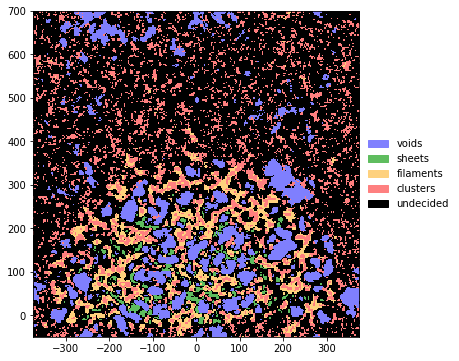

In [15]:
void_blue = (128./256,128./256,255./256,1.)
sheet_green = (95./256,190./256,95./256,1.)
filament_yellow = (255./256,210./256,126./256,1.)
cluster_red = (255./256,128./256,128./256,1.)
StructuresMap=ListedColormap(['black',void_blue,sheet_green,filament_yellow,cluster_red])
plt.figure(figsize=(6,6))
plt.imshow(MAP[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], cmap=StructuresMap)
u_patch = mpatches.Patch(color='black', label='undecided')
v_patch = mpatches.Patch(color=void_blue, label='voids')
s_patch = mpatches.Patch(color=sheet_green, label='sheets')
f_patch = mpatches.Patch(color=filament_yellow, label='filaments')
c_patch = mpatches.Patch(color=cluster_red, label='clusters')
handles = [v_patch,s_patch,f_patch,c_patch,u_patch]
plt.legend(handles=handles,frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

## Credit


If you are using this data in your publications please cite the following publication:

> Leclercq, F. and Jasche, J. and Wandelt, B. (2015b)<br />
> *Bayesian analysis of the dynamic cosmic web in the SDSS galaxy survey*<br />
> [Journal of Cosmology and Astroparticle Physics 06, 015 (2015)](http://dx.doi.org/10.1088/1475-7516/2015/06/015)<br />
> [arXiv:1502.02690 [astro-ph.CO]](https://arxiv.org/abs/1502.02690)

As cosmic web analysis is a derived product of the BORG SDSS analysis, we also kindly ask you to cite the following publications:

> Jasche, J. and Wandelt, B. D. (2013)<br />
> *Bayesian physical reconstruction of initial conditions from large-scale structure surveys*<br />
> [Monthly Notices of the Royal Astronomical Society 432, 894-913 (2013)](http://dx.doi.org/10.1093/mnras/stt449)<br />
> [arXiv:1203.3639 [astro-ph.CO]](https://arxiv.org/abs/1203.3639)

and:

> Jasche, J. and Leclercq, F. and Wandelt, B. D. (2015)<br />
> *Past and present cosmic structure in the SDSS DR7 main sample*<br />
> [Journal of Cosmology and Astroparticle Physics 01, 036 (2015)](http://dx.doi.org/10.1088/1475-7516/2013/11/048)<br />
> [arXiv:1409.6308 [astro-ph.CO]](https://arxiv.org/abs/1409.6308)

as well as the 'T-web' paper:

> Hahn, O. and Porciani, C. and Carollo, C. M. and Dekel, A. (2007)<br />
> *Properties of dark matter haloes in clusters, filaments, sheets and voids*<br />
> [Monthly Notices of the Royal Astronomical Society 375, 489-499 (2007)](http://dx.doi.org/10.1111/j.1365-2966.2006.11318.x)<br />
> [arXiv:astro-ph/0610280](https://arxiv.org/abs/astro-ph/0610280)

If you use the decision theory formalism, please cite the following publication:

> Leclercq, F. and Jasche, J. and Wandelt, B. (2015c)<br />
> *Cosmic web-type classification using decision theory*<br />
> [Astronomy & Astrophysics Letters, 576, L17 (2015)](http://dx.doi.org/10.1051/0004-6361/201526006)<br />
> [arXiv:1503.00730 [astro-ph.CO]](https://arxiv.org/abs/1503.00730)

We suggest, for example, the following sentences:
> 'This work uses the cosmic web maps obtained by Leclercq et al. (2015b), based on the T-web definition (Hahn et al. 2007) and on the analysis of the SDSS (Jasche et al. 2015) by the BORG algorithm (Jasche & Wandelt 2013).'

> 'This work uses the formalism introduced by Leclercq et al. (2015c) for cosmic web classification using decision theory.'